## Exercise 5
$$\large \textbf{Regularization}$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = np.loadtxt('./ex5Data/ex5Linx.dat', dtype=np.float32)
y = np.loadtxt('./ex5Data/ex5Liny.dat', dtype=np.float32)
x.shape, y.shape

((7,), (7,))

In [13]:
x

array([-0.99768, -0.69574, -0.40373, -0.10236,  0.22024,  0.47742,
        0.82229], dtype=float32)

### Plot the data

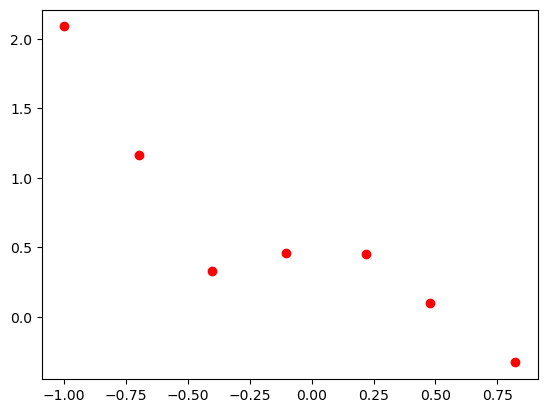

In [14]:
plt.scatter(x, y, marker='o', c='r')
plt.show()

In [15]:
x.shape

(7,)

### Transforming x into a feature matrix X for polynomial regression up to the fifth order.

In [16]:
X = x.reshape(x.shape[0], 1)

In [17]:
X

array([[-0.99768],
       [-0.69574],
       [-0.40373],
       [-0.10236],
       [ 0.22024],
       [ 0.47742],
       [ 0.82229]], dtype=float32)

In [18]:
X.shape

(7, 1)

In [19]:
X2=X**2
X3=X**3
X4=X**4
X5=X**5
X=np.concatenate((np.ones((X.shape[0], 1), dtype=np.float32), X,X2,X3,X4,X5),axis=1)

In [20]:
X.shape

(7, 6)

In [21]:
X

array([[ 1.00000000e+00, -9.97680008e-01,  9.95365381e-01,
        -9.93056178e-01,  9.90752280e-01, -9.88453746e-01],
       [ 1.00000000e+00, -6.95739985e-01,  4.84054118e-01,
        -3.36775810e-01,  2.34308392e-01, -1.63017720e-01],
       [ 1.00000000e+00, -4.03730005e-01,  1.62997916e-01,
        -6.58071488e-02,  2.65683215e-02, -1.07264286e-02],
       [ 1.00000000e+00, -1.02360003e-01,  1.04775699e-02,
        -1.07248407e-03,  1.09779474e-04, -1.12370271e-05],
       [ 1.00000000e+00,  2.20239997e-01,  4.85056564e-02,
         1.06828855e-02,  2.35279859e-03,  5.18180372e-04],
       [ 1.00000000e+00,  4.77420002e-01,  2.27929860e-01,
         1.08818270e-01,  5.19520193e-02,  2.48029344e-02],
       [ 1.00000000e+00,  8.22290003e-01,  6.76160872e-01,
         5.56000292e-01,  4.57193494e-01,  3.75945628e-01]], dtype=float32)

In [22]:
x

array([-0.99768, -0.69574, -0.40373, -0.10236,  0.22024,  0.47742,
        0.82229], dtype=float32)

### Hypothesis, Cost and Gradient Functions

In [23]:
def hypothesis(x, w):
    return np.dot(x, w)

#### Regularized Cost function formula:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 

In [24]:
def cost(x, y, w, lam):
    reg_term = (lam / (2 * x.shape[0])) * np.sum(w[1:]**2)
    return (1 / (2 * x.shape[0])) * np.sum((hypothesis(x, w) - y)**2) + reg_term

#### Regularized Gradient Descent Formula:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [27]:
def gradient_theta(x,y, w, lam):
    m = x.shape[0] # len(X)
    reg_term = lam/m*w
    reg_term[0] = 0
    return (1/m)*np.dot(x.T, (hypothesis(x, w) - y)) + reg_term

In [28]:
X.shape[1]

6

### For lamda = 0

In [29]:
w = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 0
lr=0.01

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, w, lam))
    w = w - lr*gradient_theta(X, y, w, lam)
    epochs.append(i)

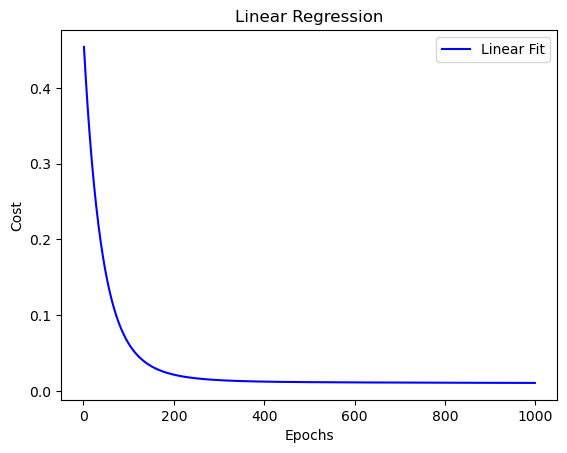

In [30]:
plt.plot(epochs, costVal, c='b', label='Linear Fit')
plt.title("Linear Regression")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [31]:
w

array([ 0.34473352, -0.49118489,  0.18445829, -0.48006744,  0.20629235,
       -0.40414299])

In [32]:
H = hypothesis(X, w)
H

array([ 2.09897747,  1.05165188,  0.61451364,  0.39748593,  0.24064967,
        0.10072884, -0.25897733])

In [33]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H, marker='+')
plt.show()

### For lamda = 1

In [34]:
w = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 1
lr=0.01

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, w, lam))
    
    w = w - lr*gradient_theta(X, y, w, lam)
    
    epochs.append(i)
    

In [35]:
H = hypothesis(X, w)
H

array([ 1.85115061,  0.98532046,  0.62085923,  0.43599217,  0.29901567,
        0.17804271, -0.12064122])

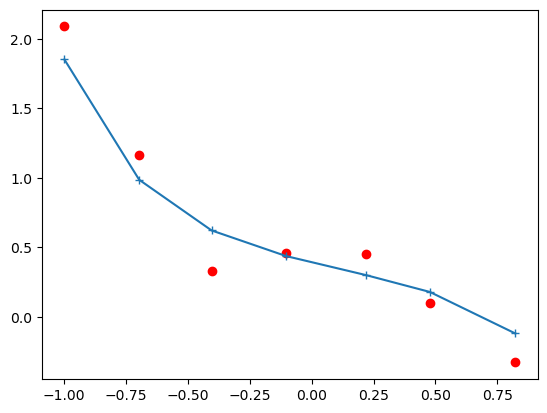

In [36]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H, marker='+')
plt.show()

### For lamda = 10

In [37]:
w = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 10
lr=0.01

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, w, lam))
    w = w - lr*gradient_theta(X, y, w, lam)
    
    epochs.append(i)

In [38]:
H = hypothesis(X, w)
H

array([1.11014371, 0.76488597, 0.61701989, 0.53982968, 0.48161705,
       0.43160691, 0.31480261])

In [39]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H, marker='+')
plt.show()

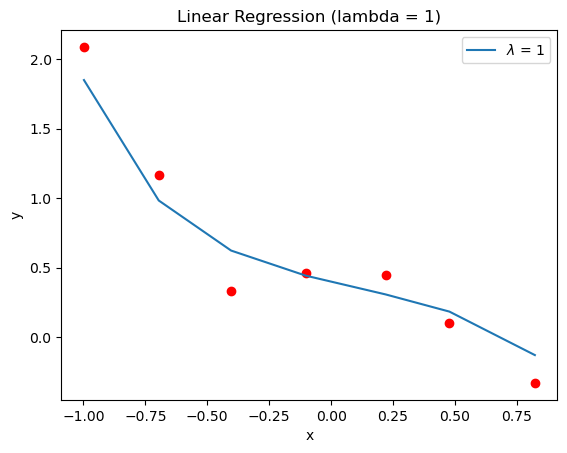

In [71]:
w = np.zeros(X.shape[1])
# epochs = np.arange(1, 1001)
lam_values = np.array([0, 1, 10])
lr = 0.1

for lam in lam_values:
    costVal = []
    w = np.zeros(X.shape[1])
    for i in range(1, 1001):
        costVal.append(cost(X, y, w, lam))
        w = w - lr * gradient_theta(X, y, w, lam)

    H = hypothesis(X, w)
    plt.scatter(x, y, marker='o', c='r')
    plt.plot(x, H, label=f'$\lambda$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression (lambda = {lam})')
    plt.legend()
    plt.show()

## Normal Equation

$$theta = \left( X^\intercal X \right)^{-1} X^\intercal y$$ 

In [27]:
theta = np.linalg.pinv(np.dot(X.T, X)).dot(np.dot(X.T, y))

In [28]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

$$theta = \left( X^\intercal X + \lambda I \right)^{-1} X^\intercal y$$ 

In [29]:
def regularized_normal_equation(X, y, lam):
    m = X.shape[0]
    n = X.shape[1]  
    # Regularization term
    reg_term = lam * np.identity(n)
    reg_term[0, 0] = 0
    
    theta = np.linalg.inv(X.T.dot(X) + reg_term).dot(X.T).dot(y)
    return theta

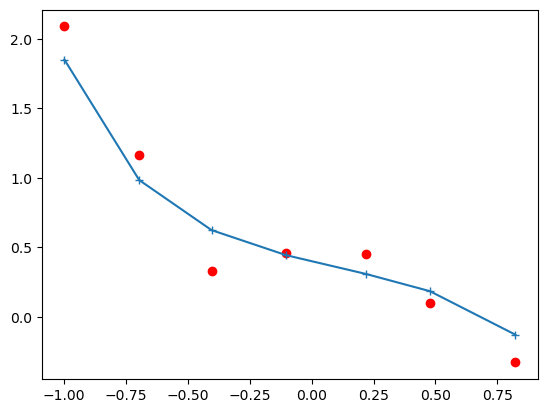

In [30]:
lam = 1
theta = regularized_normal_equation(X, y, lam)
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

In [74]:
lam = 10
theta = regularized_normal_equation(X, y, lam)
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

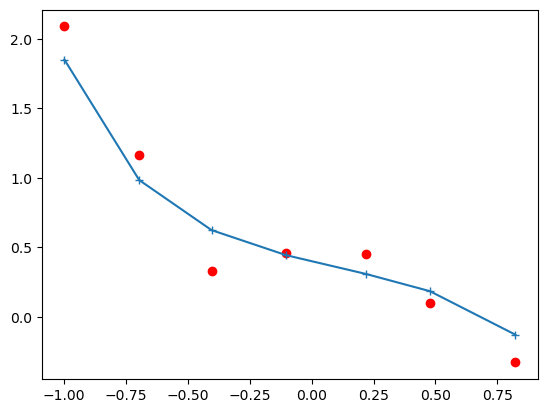

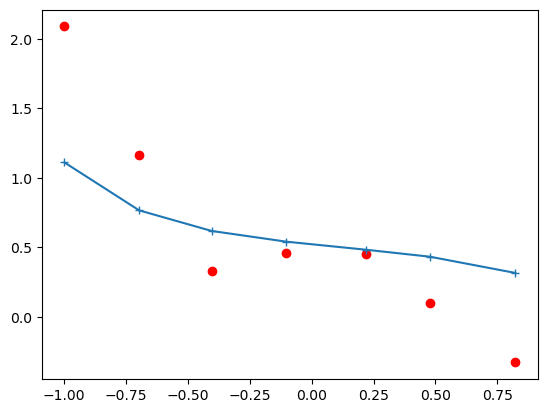

In [75]:
lam = [0,1,10]
for l in lam:
    theta = regularized_normal_equation(X, y, l)
    plt.scatter(x, y, marker='o', c='r')
    plt.plot(x, hypothesis(X, theta), marker='+')
    plt.show()

---
Thank You